In [19]:
#お題①

In [20]:
#必要なライブラリのインポート
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
#csv読み込み
df=pd.read_csv("https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv",header = None)

#列名の変更
feature =["pregnant","glucose","diastolic BP","subcutaneous fat","serum insulin","BMI","diabetes pedigree function","age","Diabetes(=1)"]
df.columns = feature
df

,pregnant,glucose,diastolic BP,subcutaneous fat,serum insulin,BMI,diabetes pedigree function,age,Diabetes(=1)
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
df2 = df[(df["glucose"]!=0) & (df["diastolic BP"]!=0) & (df["subcutaneous fat"]!=0) & 
             (df["serum insulin"]!=0) & (df["BMI"]!=0)]#0にならないはずが0になっている行の削除
df2

,pregnant,glucose,diastolic BP,subcutaneous fat,serum insulin,BMI,diabetes pedigree function,age,Diabetes(=1)
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
6,3,78,50,32,88,31.0,0.248,26,1
8,2,197,70,45,543,30.5,0.158,53,1
13,1,189,60,23,846,30.1,0.398,59,1
...,...,...,...,...,...,...,...,...,...
753,0,181,88,44,510,43.3,0.222,26,1
755,1,128,88,39,110,36.5,1.057,37,1
760,2,88,58,26,16,28.4,0.766,22,0
763,10,101,76,48,180,32.9,0.171,63,0


In [5]:
#教師あり学習のライブラリの読み込み
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,plot_roc_curve
from sklearn.model_selection import GridSearchCV

In [6]:
#データの分割
X = df2.iloc[:,:8]                   #最後の列以外は説明変数
y = df2.iloc[:,8:].values.flatten()    #最後の列は目的変数  
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0) #学習用データと検証用データに分割
X_train

,pregnant,glucose,diastolic BP,subcutaneous fat,serum insulin,BMI,diabetes pedigree function,age
293,1,128,48,45,194,40.5,0.613,24
480,3,158,70,30,328,35.5,0.344,35
187,1,128,98,41,58,32.0,1.321,33
340,1,130,70,13,105,25.9,0.472,22
51,1,101,50,15,36,24.2,0.526,26
...,...,...,...,...,...,...,...,...
633,1,128,82,17,183,27.5,0.115,22
380,1,107,72,30,82,30.8,0.821,24
243,6,119,50,22,176,27.1,1.318,33
107,4,144,58,28,140,29.5,0.287,37


In [7]:
#お題②

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


<function matplotlib.pyplot.show(close=None, block=None)>

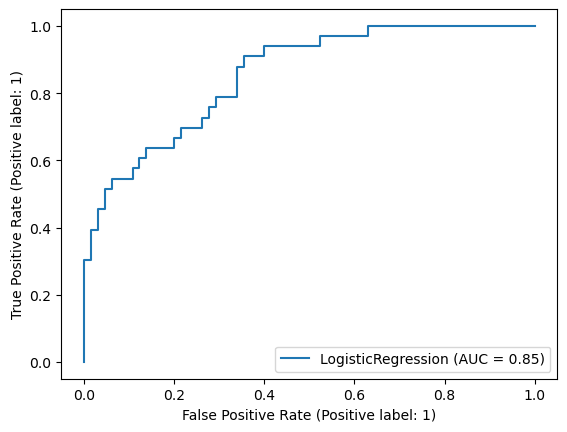

In [8]:
#ロジスティック回帰回帰

from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()
clf.fit(X_train,y_train)
disp=plot_roc_curve(clf,X_test,y_test)
plt.show

/opt/conda/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


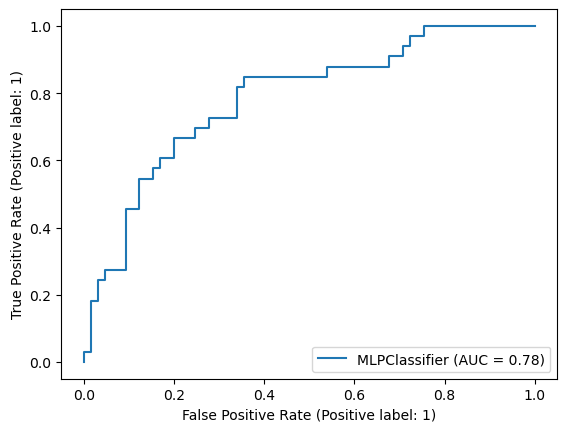

In [9]:
#ニュートラルネットワーク
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier()
clf.fit(X_train,y_train)            #学習
disp = plot_roc_curve(clf, X_test, y_test)
plt.show()

/opt/conda/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


<function matplotlib.pyplot.show(close=None, block=None)>

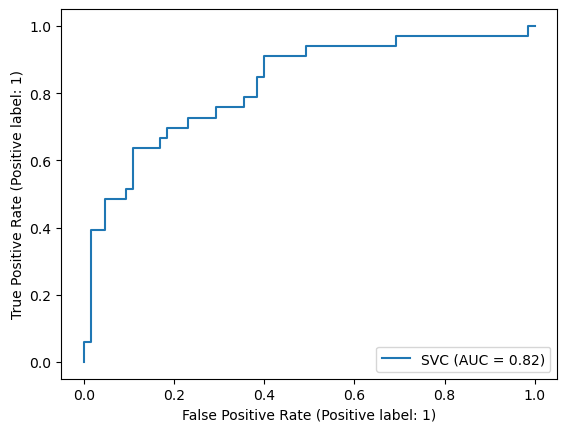

In [10]:
#カーネルSVM
from sklearn.svm import SVC

clf = SVC()
clf.fit(X_train,y_train)
disp=plot_roc_curve(clf,X_test,y_test)
plt.show

/opt/conda/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


<function matplotlib.pyplot.show(close=None, block=None)>

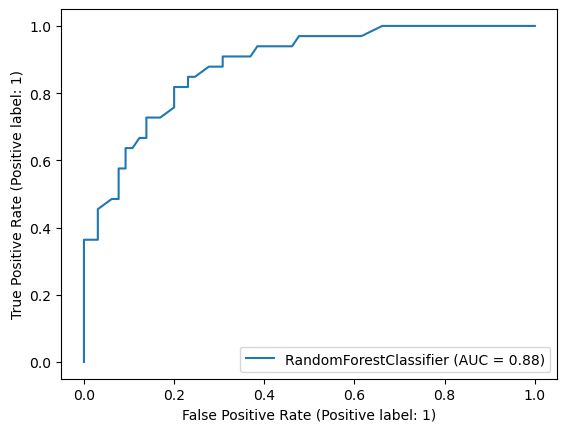

In [11]:
#ランダムフォレスト
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()
clf.fit(X_train,y_train)
disp = plot_roc_curve(clf,X_test,y_test)
plt.show

/opt/conda/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


<function matplotlib.pyplot.show(close=None, block=None)>

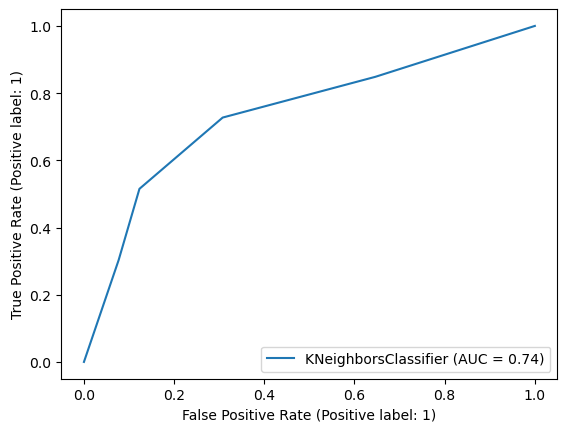

In [12]:
#K近傍方
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier()
clf.fit(X_train,y_train)
disp = plot_roc_curve(clf,X_test,y_test)
plt.show

In [13]:
#お題③

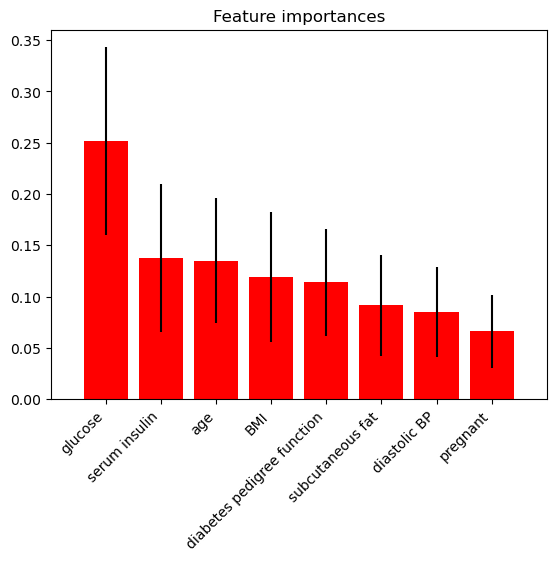

In [16]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()
clf.fit(X_train,y_train)

importances=clf.feature_importances_        #重要度
std = np.std([tree.feature_importances_ for tree in clf.estimators_],axis=0)#標準偏差、全ての軸
indices = np.argsort(importances)[::-1]

# Plot the impurity-based feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(np.array(X_train.columns)[indices], importances[indices],
        color="r", yerr=std[indices], align="center")
plt.xticks(np.array(X_train.columns)[indices],rotation=45,ha='right')
plt.xlim([-1, X.shape[1]])
plt.show()

In [17]:
#お題④

/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

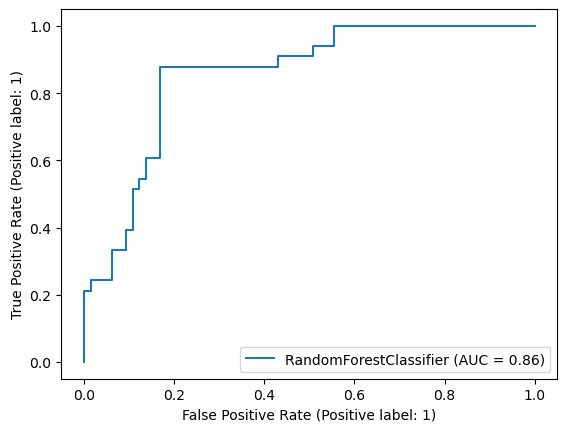

In [18]:
from sklearn.model_selection import GridSearchCV

scoring = "roc_auc"     #グリッドサーチのときに使う指標

params = {
  'bootstrap': [True, False],                   #ブートストラップサンプリングをするか
  'class_weight': [None,'balanced'],            #陽性例数と陰性例数の不均衡を補正するか  
  'criterion': ['gini', 'entropy'],                 #決定木の分割のときに使う指標
  'max_depth': [None, 2],            #最大の木の深さ（Noneだと制限なし）
  'max_features': ['auto', 4, 5],   #一回の分割に使う変数の数（autoだと√変数の数）
  'n_estimators': [100,500]       #作る木の数
}

gs = GridSearchCV(RandomForestClassifier(), params, scoring=scoring, n_jobs=2)
gs.fit(X_train, y_train)

model = gs.best_estimator_

disp = plot_roc_curve(model, X_test, y_test)
plt.show()